# 1-D Framework
<p>This notebook represents the cumulative and current state of the 1D functions that I have yet created.</p>

In [14]:
import numpy as np
import matplotlib.pyplot as plt

class FlowModel:
    
    def __init__(self, length = 10, numElements = 10, conductivity = .1, diffusivity = .05):
        self.length = length
        self.numElements = numElements
        self.conductivity = conductivity
        self.heads = np.zeros(numElements)
        self.scale = length/numElements
        self.plt = plt
        self.diffusivity = diffusivity
        self.solutePeak = 0   # Accurate tracker for the solute peak
        self.concentrations = np.zeros(numElements)
        
    # Flow Functions
    #---------------------------------------------------------------------------
    def flow(self):
        '''
        Normal 1D flow equation
        '''
        queue = np.zeros(self.numElements)
        queue[:-1] += conductivity*(self.heads[1: ] - self.heads[:-1])/self.scale
        queue[1: ] += conductivity*(self.heads[:-1] - self.heads[1: ])/self.scale
        heads += queue
        del queue
        
    def averageVelocity(self):
        '''
        Determines the average velocity for each element of the array
        '''
        pass

    # Solute Transport
    #---------------------------------------------------------------------------
    def advection(self):
        '''
        Models advection, the transport of solute with the bulk fluid motion
        - Follows the motion of the largest
        '''
        new = self.solutePeak + self.averageVelocity()
        if new > int(self.solutePeak):
            queue = np.zeros(self.numElements)
            queue[1: ] += (self.concentrations[:-1] - self.concentrations[1: ])
            queue[:-1] += (self.concentrations[1: ] - self.concentrations[:-1])
            self.concentrations += queue
            del queue
    
    def diffusion(self):
        pass
    
    def dispersion(self):
        pass
        
    # Plotting and other things
    #---------------------------------------------------------------------------
    def plotHeads(self):
        self.plt.plot(self.heads)
        self.plt.xlim(0,self.length)
        self.plt.xlabel("Length")
        self.plt.ylabel("Hydraulic head")
        self.plt.title("Hydraulic head over the model")
        self.plt.show()
        
    def __str__(self):
        print("Flow Model")
        print("--------------")
        print("Number of elements:",self.numElements)
        print("Model Length:",self.length, "meters")
        print("Scale", self.scale, ("meters per element"))
        print("Hydraulic conductivity:", self.conductivity)
        return None
    
    def setDefaults(self):
        self.heads[0] = 1
        self.heads[-1] = 0

## Testing the model

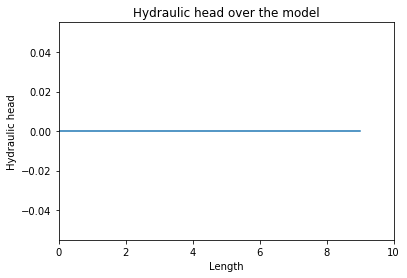

In [15]:
mod = FlowModel()
mod.plotHeads()